# Аналитика в Яндекс.Афише

Описание проекта.

задание: 

помочь маркетологам Яндекс.Афиши оптимизировать маркетинговые затраты.
Данные с июня 2017 по конец мая 2018 года: лог сервера с данными о посещениях сайта Яндекс.Афиши, выгрузка всех заказов за этот период, статистика рекламных расходов.

Изучим:

как люди пользуются продуктом,когда они начинают покупать,сколько денег приносит каждый клиент, когда клиент окупается.

Шаг 1. Загрузить данные и подготовить их к анализу

Шаг 2. Построить отчёты и посчитать метрики

Продукт

Сколько людей пользуются в день, неделю, месяц?
Сколько сессий в день?
Сколько длится одна сессия?
Как часто люди возвращаются?

Продажи

Когда люди начинают покупать?
Сколько раз покупают за период?
Какой средний чек?
Сколько денег приносят? (LTV)

Маркетинг

Сколько денег потратили? Всего / на каждый источник / по времени
Сколько стоило привлечение одного покупателя из каждого источника?
На сколько окупились расходы? (ROI)
Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?


Шаг 3. Написать вывод: рекомендации маркетологам, куда и сколько им стоит вкладывать денег?
Какие источники/платформы порекомендовали бы? Объяснить свой выбор: на какие метрики ориентируетесь? Почему? Какие выводы сделали, узнав значение метрик?



## Шаг 1. Открыть файл с данными и изучить общую информацию. 

Вызовем необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st


Прочитаем файл с данными и сохраним в переменные.

In [62]:

visits = pd.read_csv('C:/Users/maxim/Desktop/visits_log.csv')
orders = pd.read_csv('C:/Users/maxim/Desktop/orders_log.csv')
costs = pd.read_csv('C:/Users/maxim/Desktop/costs.csv')


Просмотрим общую информацию, определим пропуски в таблицах.

In [63]:
def analysis(date):
    """
    функция показывает ифнормацию о таблицах
   
    """
    date.info()
    date.columns = date.columns.str.lower() # переведем названия столбцов в нижний регистр
    display(date.describe(include = [np.number])) # просмотр числового описания данных с помощью метода .describe(), результат только для цифровых столбцов
    display(date.describe(include = [np.object])) # просмотр описания столбцов со строковыми данными
    display(date.head()) # просмотр первых 5 строк
    display(date.isnull().sum()) # просмотр нулевых значений с помощью метода isnull()
    display(date.duplicated().sum())# получили суммарное кол-во дубликатов в таблице


  

In [64]:
analysis(visits)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,source id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


,device,end ts,start ts
count,359400,359400,359400
unique,2,224760,224303
top,desktop,2017-11-24 16:51:00,2017-11-24 16:06:00
freq,262567,23,19


,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


device       0
end ts       0
source id    0
start ts     0
uid          0
dtype: int64

0

In [65]:
analysis(orders)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


,buy ts
count,50415
unique,45991
top,2018-05-31 10:13:00
freq,9


,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


buy ts     0
revenue    0
uid        0
dtype: int64

0

In [66]:
analysis(costs)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


,dt
count,2542
unique,364
top,2018-04-28
freq,7


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


source_id    0
dt           0
costs        0
dtype: int64

0

Переименовать колонки с помощью метода rename()

In [67]:
visits = visits.rename(columns={'source id':'source_id'}).reset_index(drop=True)
visits = visits.rename(columns={'end ts':'end_ts'}).reset_index(drop=True)
visits = visits.rename(columns={'start ts':'start_ts'}).reset_index(drop=True)
orders = orders.rename(columns={'buy ts':'buy_ts'}).reset_index(drop=True)



Изменим тип данных в столбцах с датами и создадим новые колонки с годом, месяцем, неделей и днем для дат в каждой таблице.

In [68]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date


In [69]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

orders['buy_year']  = orders['buy_ts'].dt.year
orders['buy_month'] = orders['buy_ts'].dt.month
orders['buy_week']  = orders['buy_ts'].dt.week
orders['buy_date'] = orders['buy_ts'].dt.date

In [70]:
costs['dt'] = pd.to_datetime(costs['dt'])

costs['buy_year']  = costs['dt'].dt.year
costs['buy_month'] = costs['dt'].dt.month
costs['buy_week']  = costs['dt'].dt.week
costs['buy_date'] = costs['dt'].dt.date

Данные чистые, пропусков нет, с помощью метода describe() увидели описание значений числовых столбцов и столбцов со строковыми данными. Изменили названия столбцов, проверили на дубликаты, поменяли тип данных в столбцах с датами.

## Шаг 2. Построение отчётов и подсчёт метрик. 

### Продукт

#### Сколько людей пользуются в день, неделю, месяц

Выделим из столбцов с датой месяцы. Вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[M]'

In [71]:
#visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['start_month'] = visits['start_ts'].astype('datetime64[M]')
#visits['end_month'] = visits['End Ts'].astype('datetime64[M]')


In [72]:
print(visits.head())

    device               end_ts  source_id            start_ts  \
0    touch  2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date start_month  
0   2017-12-20  2017-12-01  
1   2018-02-19  2018-02-01  
2   2017-07-01  2017-07-01  
3   2018-05-20  2018-05-01  
4   2017-12-27  2017-12-01  


На активных пользователей смотрят в трёх измерениях:
   
- DAU (от англ. daily active users) — количество уникальных пользователей в день;
- WAU (от англ. weekly active users) — количество уникальных пользователей в неделю;
- MAU (от англ. monthly active users) — количество уникальных пользователей в месяц.

Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее:

In [73]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print('Кол-во уникальных пользователей в день -', int(dau_total))
print('Кол-во уникальных пользователей в неделю -', int(wau_total))
print('Кол-во уникальных пользователей в месяц -', int(mau_total))

Кол-во уникальных пользователей в день - 907
Кол-во уникальных пользователей в неделю - 5716
Кол-во уникальных пользователей в месяц - 23228


Построим график изменения уникальных пользователей по неделям и по месяцам

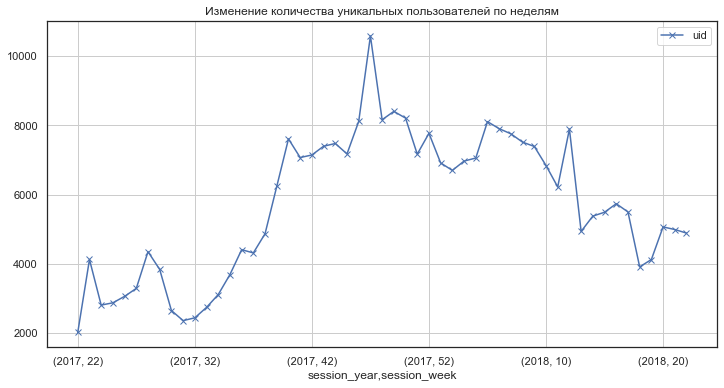

In [74]:
visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).\
        plot(grid=True, figsize=(12, 6), title = 'Изменение количества уникальных пользователей по неделям', style = '-x')
plt.show()

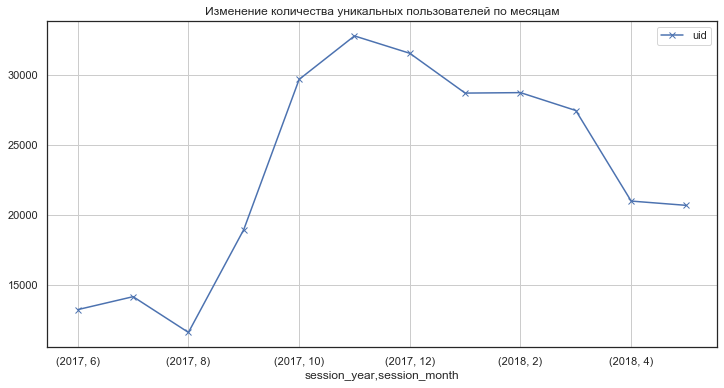

In [75]:
visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).\
        plot(grid=True, figsize=(12, 6), title = 'Изменение количества уникальных пользователей по месяцам', style = '-x')
plt.show()


Построим график изменения кол-ва пользователей в зависимости от устройства и от рекламного источника

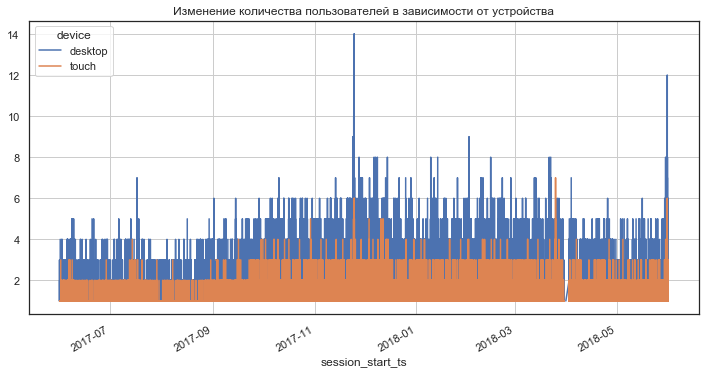

In [76]:
visits['session_start_ts'] = pd.to_datetime(visits['start_ts']) # с помощью метда to_datetime перевели значения в столбце в формат даты
visits.pivot_table(index='session_start_ts', columns='device', values='uid', aggfunc='count').\
        plot(figsize=(12,6), grid=True, title = 'Изменение количества пользователей в зависимости от устройства')

plt.show()

In [77]:
visits['device'].value_counts()


desktop    262567
touch       96833
Name: device, dtype: int64

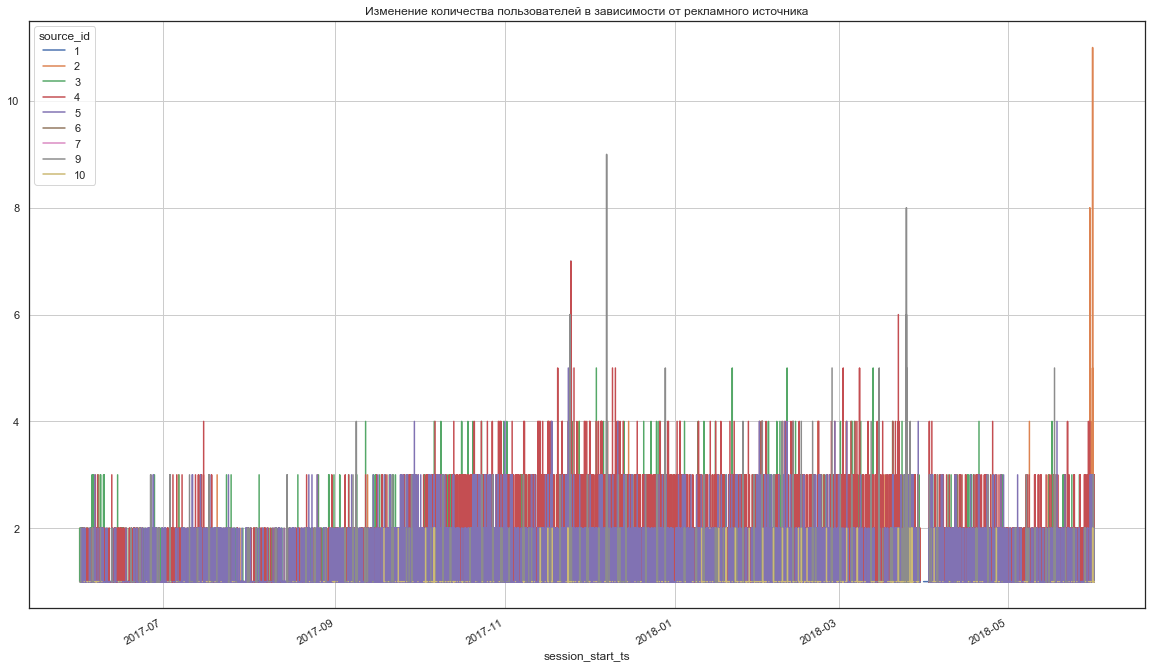

In [78]:
visits.pivot_table(index='session_start_ts', columns='source_id', values='uid', aggfunc='count').\
        plot(figsize=(20,12), grid=True, title = 'Изменение количества пользователей в зависимости от рекламного источника')
plt.show()

In [79]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

Ещё одна метрика — sticky factor. С помощью этой метрики можно увидеть регулярность использования продукта — то, как часто пользователи к нему обращаются.

In [80]:
sticky_wau = dau_total/wau_total*100
sticky_mau = dau_total/mau_total*100
print(sticky_wau)
print(sticky_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


Средние значения метрики важны, так как эти значения можно использовать в формулах для экономических расчетов, а также эти метрики в основном растут и поэтому служат мотивацией. 
Среднестатистическое значение sticky factor составялет 20%, на основании этого видим, что в нашем случае значения этой метрики ниже среднего. Не так много пользователей регулярно пользуются продуктом.

Кол-во уникальных пользователей в день, неделю и месяц составляет 907, 5716, 23228 соответственно. Их количество растет ближе к концу года - в ноябре, это связано с тем, что именно в это время люди начинают планировать свой досуг на новогодние праздники, а также мероприятия на следующий год, покупать подарки. Минимум пользовательской активности наблюдается в летнее время, это может быть связано с тем, что многие пользователи находятся в это время в отпусках. 

В качестве устройства для пользования продуктом пользователи предпочитают desktop. Пользователей больше всего приходит из рекламного источника, идентификатор которого равен 4, меньше всего пользователей приходит из источника 6

#### Сколько сессий в день

Найдем эту метрику — разделим число сессий на количество пользователей за период:

In [81]:
# преобразуем столбцы в формат даты
visits['session_start_ts'] = pd.to_datetime(visits['start_ts'])
visits['session_end_ts'] = pd.to_datetime(visits['end_ts'])
visits['session_day']  = visits['start_ts'].dt.day
 
sessions_per_user = visits.groupby(['session_year', 'session_day']).agg({'uid': ['count','nunique']}) # сгруппировали данные по году и дню и посчитали кол-во уникальных пользователей
sessions_per_user.columns = ['n_sessions', 'n_users'] # дали названия столбцам
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
print('Среднее количество сессий в день: {:.1f}'.format(sessions_per_user['sessions_per_user'].mean()))

Среднее количество сессий в день: 1.1


Text(0.5, 1.0, 'Среднее количество сессий в день')

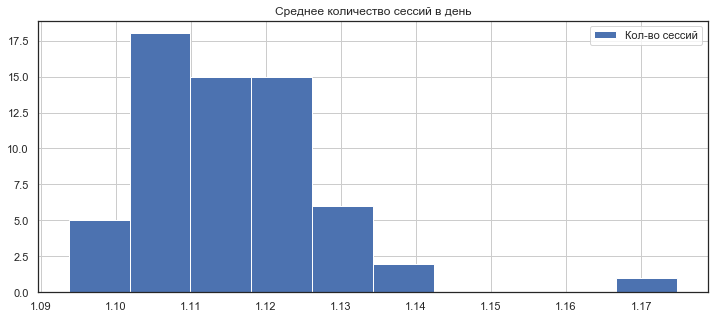

In [82]:
plt.figure(figsize=(12,5)) 
sessions_per_user['sessions_per_user'].hist(label='Кол-во сессий') 
plt.legend(loc='upper right') # Укажем отображение легенды
plt.title('Среднее количество сессий в день') 
plt.show()

В день пользователи проводят максимум одну сессию.

#### Сколько длится одна сессия?

Средняя продолжительность сессии или ASL показывает, сколько длится сессия пользователя в среднем. Найдём ASL — посчитаем длину всех сессий и вычислим среднее:

In [83]:
visits['session_duration_sec'] = (visits['session_end_ts'] - visits['session_start_ts']).dt.seconds # посчитали длительность сессии

Посмотрим на раcпределение продолжительности сессии.

Text(0.5, 1.0, 'Распределение продолжительности сессии')

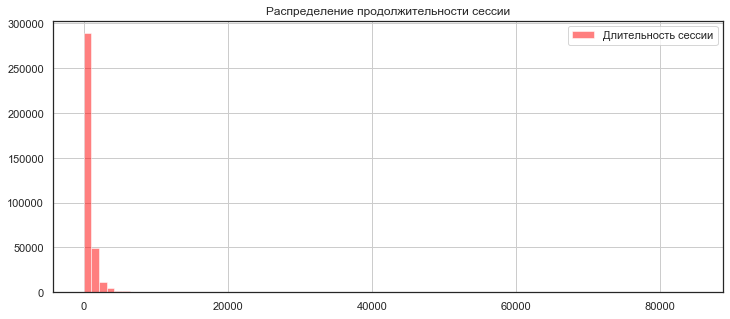

In [84]:
plt.figure(figsize=(12,5)) 
visits['session_duration_sec'].hist(color='red', alpha=0.5, bins=80, label='Длительность сессии') 

plt.legend(loc='upper right') # Укажем отображение легенды
plt.title('Распределение продолжительности сессии') 
plt.show()

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше распределение не похоже на нормальное, поэтому посчитаем медиану, среднее и моду:

In [85]:

print(visits['session_duration_sec'].mode())

0    60
dtype: int64


In [86]:
print(visits['session_duration_sec'].mean())

643.506488592098


In [87]:
print(visits['session_duration_sec'].median())

300.0


Возьмем значение, которое чаще всего встречается - 60. Это значение минимальное и нужно понять, почему так происходит, успевают ли пользователи совершить покупку за это время или нет, скорее всего пользователи заходят на сайт и, не совершив никаких действий, уходят.

#### Как часто люди возвращаются

Сгруппируем данные по столбцу 'uid' методом groupby(). Для каждого клиента получим дату его первого визита с помощью метода min()

In [88]:
first_visit_date_by_customers = visits.groupby('uid')['session_start_ts'].min() 
print (first_visit_date_by_customers.head())

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: session_start_ts, dtype: datetime64[ns]


Чтобы в результирующем датафрейме не было двух столбцов с одинаковыми названиями, изменим имя Series на first_visit_date, обратившись к атрибуту name у Series.

In [89]:
first_visit_date_by_customers.name = 'first_visit_date'
# обращаемся к атрибуту name Series в переменной first_order_date_by_customers

Методом join() объединим датафрейм visits и Series first_order_date_by_customers по столбцу 'uid':

In [90]:
visits_join = visits.join(first_visit_date_by_customers,on='uid')
print(visits_join.head())

    device               end_ts  source_id            start_ts  \
0    touch  2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date start_month    session_start_ts      session_end_ts  \
0   2017-12-20  2017-12-01 2017-12-20 17:20:00 2017-12-20 17:38:00   
1   2018-02-19  2018-02-01 2018-02-19 16:5

В таблице появился столбец first_visit_date с датами первой покупки клиента.
Следующим шагом выделим из столбцов first_visit_date и visit_date месяцы. Вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[M]'.

In [91]:
visits_join['first_visit_month'] = visits_join['first_visit_date'].astype('datetime64[M]')
visits_join['visit_month'] = visits_join['session_start_ts'].astype('datetime64[M]')
print(visits_join.head(10))

    device               end_ts  source_id            start_ts  \
0    touch  2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7           

Когортой станет столбец first_visit_month — месяц, в котором был сделан первый заказ. Сгруппируем данные по этому столбцу и оценим показатели каждой когорты. Применим метод agg. Ему передают словарь, где ключ — название столбца, а значение — агрегирующая функции.

In [92]:
visits_grouped_by_cohorts = visits_join.groupby(['first_visit_month','visit_month']).agg({'uid':'nunique'})
print(visits_grouped_by_cohorts.head(20))
print(visits_grouped_by_cohorts.tail(21))

                                 uid
first_visit_month visit_month       
2017-06-01        2017-06-01   13259
                  2017-07-01    1043
                  2017-08-01     713
                  2017-09-01     814
                  2017-10-01     909
                  2017-11-01     947
                  2017-12-01     809
                  2018-01-01     766
                  2018-02-01     694
                  2018-03-01     674
                  2018-04-01     539
                  2018-05-01     596
2017-07-01        2017-07-01   13140
                  2017-08-01     737
                  2017-09-01     674
                  2017-10-01     738
                  2017-11-01     765
                  2017-12-01     633
                  2018-01-01     596
                  2018-02-01     601
                                 uid
first_visit_month visit_month       
2017-12-01        2017-12-01   25268
                  2018-01-01    1410
                  2018-02-01     960
 

количество пользователей, составляющих каждую когорту, варьируется, но к последней когорте увеличивается. Значит, в магазин со временем приходит больше новых пользователей, совершающих покупки.

Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты. В качестве делителя обратимся к константе np.timedelta64(1,'M')

In [93]:
visits_grouped_by_cohorts = visits_grouped_by_cohorts.reset_index()
visits_grouped_by_cohorts['cohort_lifetime'] = visits_grouped_by_cohorts['visit_month'] - visits_grouped_by_cohorts['first_visit_month']
visits_grouped_by_cohorts['cohort_lifetime'].head()

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

Получили столбец cohort_lifetime с типом timedelta, который хранит в себе разницу между двумя датами.

Преобразуем этот тип в число месяцев, прошедших между датами. Для этого cohort_lifetime разделим на константу np.timedelta64(1, 'M')

In [94]:
visits_grouped_by_cohorts['cohort_lifetime'] = visits_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
print(visits_grouped_by_cohorts['cohort_lifetime'].head())

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    4.008296
Name: cohort_lifetime, dtype: float64


Округлим значения столбца cohort_lifetime методом round(), а затем приведём их к целочисленному типу методом astype('int')

In [95]:
visits_grouped_by_cohorts['cohort_lifetime'] = visits_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
print(visits_grouped_by_cohorts[['first_visit_month','visit_month','cohort_lifetime']].head())
print(visits_grouped_by_cohorts[['first_visit_month','visit_month','cohort_lifetime']].tail())

  first_visit_month visit_month  cohort_lifetime
0        2017-06-01  2017-06-01                0
1        2017-06-01  2017-07-01                1
2        2017-06-01  2017-08-01                2
3        2017-06-01  2017-09-01                3
4        2017-06-01  2017-10-01                4
   first_visit_month visit_month  cohort_lifetime
73        2018-03-01  2018-04-01                1
74        2018-03-01  2018-05-01                2
75        2018-04-01  2018-04-01                0
76        2018-04-01  2018-05-01                1
77        2018-05-01  2018-05-01                0


Получили целое число месяцев, обозначающее порядковый месяц совершения покупки относительно месяца первой покупки.

Оставим в обозначении когорты только год и месяц. Применим метод dt.strftime() 

In [96]:
visits_grouped_by_cohorts['first_visit_month'].dt.strftime('%d.%m.%Y')

0     01.06.2017
1     01.06.2017
2     01.06.2017
3     01.06.2017
4     01.06.2017
         ...    
73    01.03.2018
74    01.03.2018
75    01.04.2018
76    01.04.2018
77    01.05.2018
Name: first_visit_month, Length: 78, dtype: object

Оставим в данных о месяце первого заказа только год и месяц:

In [97]:
visits_grouped_by_cohorts['first_visit_month'] = visits_grouped_by_cohorts['first_visit_month'].dt.strftime('%Y-%m')


Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённую «неделю жизни»:

In [98]:
cohorts = visits_grouped_by_cohorts.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'mean'}).reset_index()
print(cohorts)

   first_visit_month  cohort_lifetime    uid
0            2017-06                0  13259
1            2017-06                1   1043
2            2017-06                2    713
3            2017-06                3    814
4            2017-06                4    909
..               ...              ...    ...
73           2018-03                1    861
74           2018-03                2    557
75           2018-04                0  15709
76           2018-04                1    760
77           2018-05                0  15273

[78 rows x 3 columns]


Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий месяц.
Найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю:

In [99]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']].reset_index()
print(initial_users_count)

    index first_visit_month    uid
0       0           2017-06  13259
1      12           2017-07  13140
2      23           2017-08  10181
3      33           2017-09  16704
4      42           2017-10  25977
5      50           2017-11  27248
6      57           2017-12  25268
7      63           2018-01  22624
8      68           2018-02  22197
9      72           2018-03  20589
10     75           2018-04  15709
11     77           2018-05  15273


Переименуем столбец user_id в cohort_users методом rename(). Параметру columns передадим словарь, где ключ — старое название столбца, а значение — новое:

In [100]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}).reset_index()
print(initial_users_count)

    level_0  index first_visit_month  cohort_users
0         0      0           2017-06         13259
1         1     12           2017-07         13140
2         2     23           2017-08         10181
3         3     33           2017-09         16704
4         4     42           2017-10         25977
5         5     50           2017-11         27248
6         6     57           2017-12         25268
7         7     63           2018-01         22624
8         8     68           2018-02         22197
9         9     72           2018-03         20589
10       10     75           2018-04         15709
11       11     77           2018-05         15273


Объединим данные по когортам с исходным количеством пользователей в когорте:

In [101]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')


Рассчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте:

In [102]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
print(cohorts)

   first_visit_month  cohort_lifetime    uid  level_0  index  cohort_users  \
0            2017-06                0  13259        0      0         13259   
1            2017-06                1   1043        0      0         13259   
2            2017-06                2    713        0      0         13259   
3            2017-06                3    814        0      0         13259   
4            2017-06                4    909        0      0         13259   
..               ...              ...    ...      ...    ...           ...   
73           2018-03                1    861        9     72         20589   
74           2018-03                2    557        9     72         20589   
75           2018-04                0  15709       10     75         15709   
76           2018-04                1    760       10     75         15709   
77           2018-05                0  15273       11     77         15273   

    retention  
0    1.000000  
1    0.078664  
2    0.053775  

Построим сводную таблицу и создадим тепловую карту:

In [103]:
retention_pivot = cohorts.query('cohort_lifetime != 0').pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

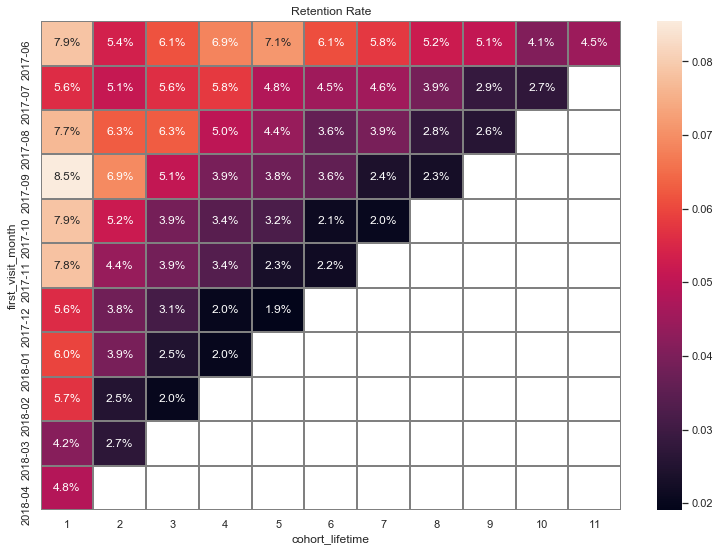

In [104]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

Retention Rate на второй месяц когорт после первого периода равен для первой когорты пришедшей с июня по июль 2017 года 7.9%, для пользователей, пришедших с марта по апрель 2018 года этот показатель равен 4.8%, так, за 11 месяцев коэффициент удержания упал на 3.1%. 

### Продажи

#### Когда люди начинают покупать

В какую по счету сессию люди начинают покупать, объединим таблицы с закзами и посещениями 

Сгруппируем данные в таблице orders по столбцу 'uid'. Для каждого клиента получим время его первого заказа

0    0.0
dtype: float64

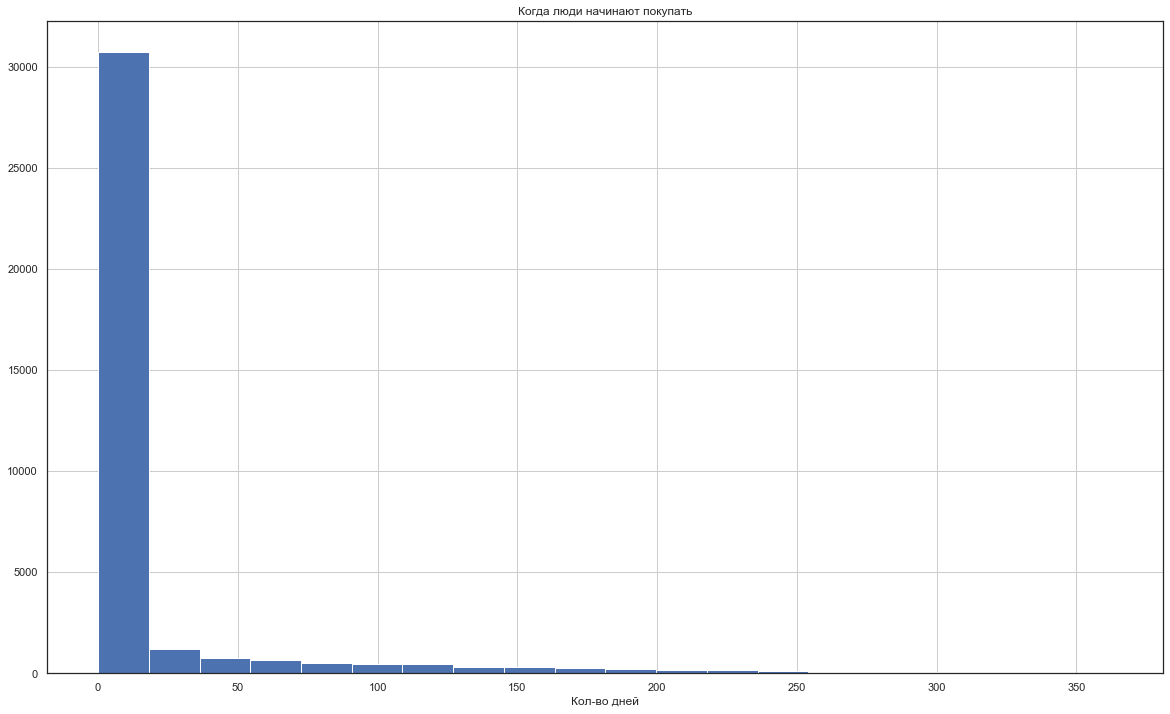

In [105]:
first_visit_date_by_customers = visits.groupby('uid')['session_start_ts'].min()#.resert_index() 
first_visit_date_by_customers.name = 'first_visit_date'

first_purchase = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_purchase.columns = ['uid', 'first_purchase']

visits_orders = first_purchase.merge(first_visit_date_by_customers, on = 'uid') # объединим таблицы по столбцу 'uid' с помощью метода merge()

visits_orders['time_first_purchase'] = pd.to_timedelta((visits_orders['first_purchase'] - visits_orders['first_visit_date']).\
                                                          dt.days, unit='d') / np.timedelta64(1, 'D')

visits_orders['time_first_purchase'].hist(bins=20, figsize=(20,12))
plt.title('Когда люди начинают покупать')
plt.xlabel('Кол-во дней')

visits_orders['time_first_purchase'].mode()
plt.show()


По графику видим, что в основном люди совершают покупки в тот же день, что и первый визит

#### Сколько покупают за период 

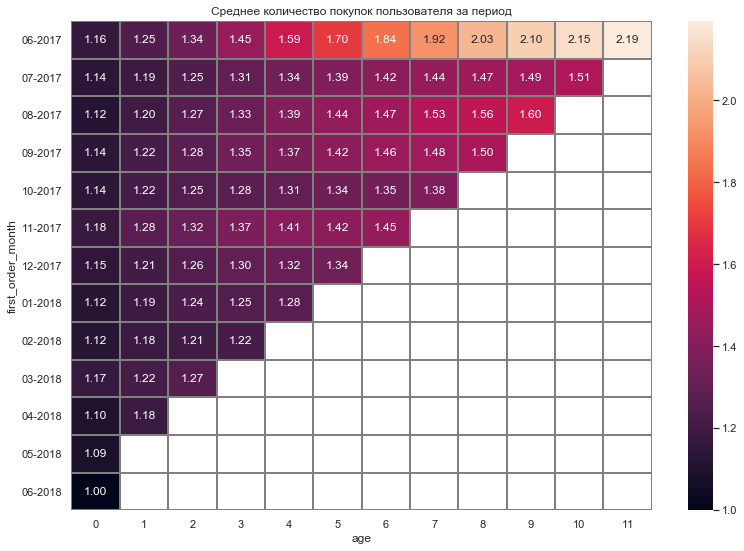

In [106]:
#сфомируем когорту по месяцу
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

#найдем месяц первой покупки пользователя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

#количество покупателей за каждый месяц
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

#месяц первой покупки каждого пользователя добавим в таблицу с заказами
orders_new = pd.merge(orders,first_orders, on='uid')

#подсчитаем количество заказов
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'buy_ts': 'count'}).reset_index()

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

#найдем возраст когорты
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#найдем количество покупок
report['rate'] = report['buy_ts'] / report['n_buyers']

#сводная таблица
report_pivot = report.pivot_table(index='first_order_month',
                                columns='age',
                                values='rate',
                                aggfunc='mean')
report_pivot.index = report_pivot.index.strftime("%m-%Y")

#тепловая карта
plt.figure(figsize=(13, 9))
plt.title('Среднее количество покупок пользователя за период')
plt.xlabel('Месяц заказа')
plt.ylabel('Первый месяц заказа')
sns.heatmap(report_pivot.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()



#### Какой средний чек

Посчитаем выручку/кол-во покупок и построим график по времени

In [107]:
orders_grouped = orders.groupby(['order_month']).agg({'revenue':'sum','uid':'nunique'}).reset_index()

orders_new = orders_new.rename(columns={'buy_ts':'order_counts'})

Средний чек за месяц равен 5.87 у.е.


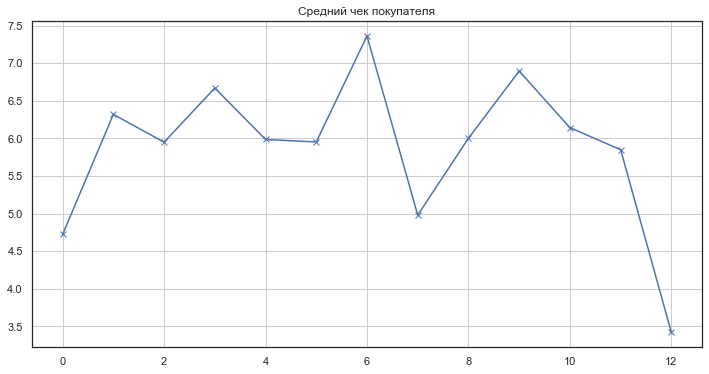

In [108]:
orders_grouped['mean_check'] = orders_grouped['revenue'] / orders_grouped['uid']
print('Средний чек за месяц равен {:.2f} у.е.'.format(orders_grouped['mean_check'].mean()))
orders_grouped['mean_check'].plot(grid=True, figsize=(12, 6), title = 'Средний чек покупателя', style = '-x')
plt.show()
#visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).plot(grid=True, figsize=(12, 6), title = 'Изменение количества уникальных пользователей по неделям', style = '-x')

#### Сколько денег приносят

Выделим месяцы из дат в таблицах с заказами и расходами:

In [109]:
orders.head()

,buy_ts,revenue,uid,buy_year,buy_month,buy_week,buy_date,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018,5,22,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018,5,22,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018,5,22,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018,5,22,2018-05-31,2018-05-01


In [110]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

Получим месяц первой покупки каждого покупателя:

In [111]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
print(first_orders.head())

                uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [112]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head())

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [113]:
orders_new = pd.merge(orders,first_orders, on='uid')

Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index():

In [114]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [115]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [116]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

Средний ltv за все время равен 8.05 у.е.


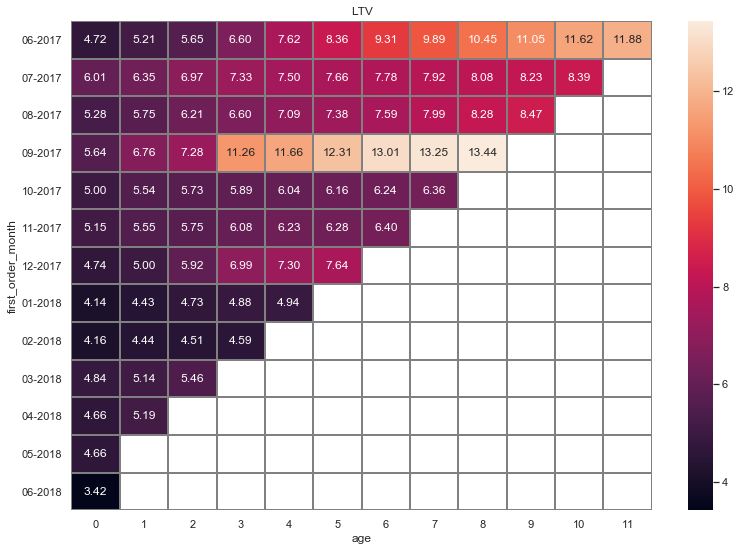

In [117]:
report['ltv'] = report['gp'] / report['n_buyers']
    
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1)

plt.figure(figsize=(13, 9))
plt.title('LTV')
output.index = output.index.strftime("%m-%Y")

sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
output.mean()
print('Средний ltv за все время равен {:.2f} у.е.'.format(output.mean().mean()))
plt.show()

Средний ltv за все время равен 8.05 у.е.

<div style="background-color:lightgreen">

### *Комментарий наставника*
Отлично, все показатели в блоке "Продажи" расчитаны верно. 
</div>


#### Маркетинг

Посмотрим, сколько месяцев нужно каждой когорте, чтобы окупить маркетинговые затраты. Посчитаем CAC каждой когорты. Сначала найдём суммарные расходы за каждый месяц, а затем поделим их на количество покупателей в каждой когорте:

In [118]:
# считаем расходы за месяц
monthly_costs = costs.groupby(['month']).agg({'costs':'sum'}).reset_index()
monthly_costs.head()

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


Добавим данные о расходах и посчитаем CAC:

In [119]:
report_new = pd.merge(report, monthly_costs, left_on=['first_order_month'], right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,2017-06-01,18015.0,8.905091


In [120]:
report_new['romi'] = report_new['ltv'] / report_new['cac']


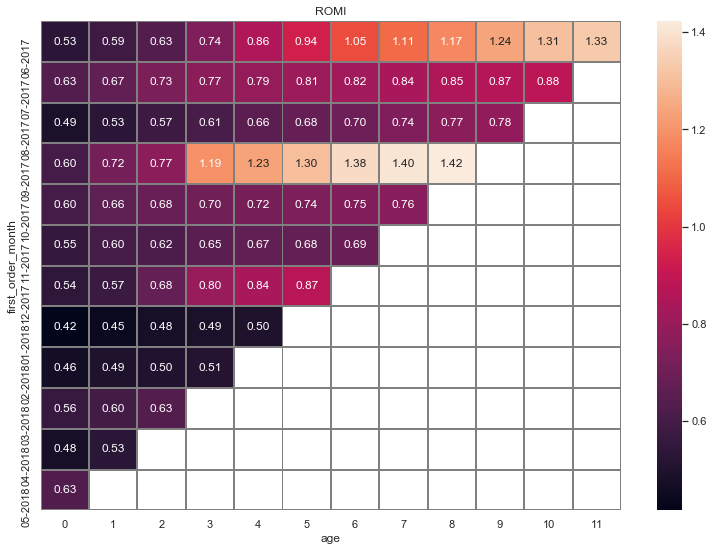

In [121]:

#Рассчитаем ROMI: поделим LTV на CAC.
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
    index=['first_order_month'],
    columns='age', 
    values='romi', 
    aggfunc='sum')

plt.figure(figsize=(13, 9))
plt.title('ROMI')
output.index = output.index.strftime("%m-%Y")


sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()


In [122]:
#На практике считают среднюю когорту — усредняют ROMI или LTV всех когорт за каждый месяц их жизни. Например, узнаем, как быстро в среднем когорты окупаются. Усредним значения каждой колонки и «сложим» таблицу в единую строку методом mean(axis=0):
output.cumsum(axis=1).mean(axis=0)
#output.fillna('')


age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

В среднем когорта окупается к 9 месяцу

In [123]:
final_result = report_new.pivot_table( index='first_order_month', columns='age', values='ltv', aggfunc='mean')# посчитайте сводную таблицу с LTV

m6_cum_ltv = final_result.cumsum(axis=1).mean(axis=0)[5]# посчитайте накопительный LTV за 6 месяцев после первой покупки

print('Средний LTV за 6 месяцев после первой покупки:', m6_cum_ltv)

Средний LTV за 6 месяцев после первой покупки: 7.969052630207336


#### Привлечение одного покупателя из каждого источника

Посмотрим сколько стоило привлечение одного покупателя из каждого источника, для этого найдем источник, с которого пользователь впервые зашел. Для этого сгруппируем данные по пользователям и источникам и с помощь метода first найдем этот источник

Найдем LTV по источникам 

In [124]:
report_new

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,18015.00,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06-01,18015.00,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,2017-06-01,18015.00,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,2017-06-01,18015.00,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,2017-06-01,18015.00,8.905091,0.114825
...,...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1063.05,1,0.300892,2018-03-01,30415.27,8.608907,0.034951
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559,2018-03-01,30415.27,8.608907,0.036655
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597,2018-04-01,22289.38,9.793225,0.475594
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599,2018-04-01,22289.38,9.793225,0.054282


In [125]:

first_source_id = visits.sort_values(by='session_start_ts').groupby(['uid']).agg({'source_id':'first'}).reset_index() 
first_source_id.columns = ['uid','first_source_id']

orders_new = first_source_id.merge(first_orders)
orders_new

,uid,first_source_id,first_order_month
0,313578113262317,2,2018-01-01
1,1575281904278712,10,2017-06-01
2,2429014661409475,3,2017-10-01
3,2464366381792757,5,2018-01-01
4,2551852515556206,5,2017-11-01
...,...,...,...
36518,18445147675727495770,5,2017-11-01
36519,18445407535914413204,3,2017-09-01
36520,18445601152732270159,2,2018-03-01
36521,18446156210226471712,3,2018-02-01


In [126]:
#сфомируем когорту по месяцу
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

#найдем месяц первой покупки пользователя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [127]:
cohort_sizes = first_orders.groupby(['first_order_month']).agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [128]:
orders_source = pd.merge(orders,first_source_id, on='uid')

orders_source

,buy_ts,revenue,uid,buy_year,buy_month,buy_week,buy_date,order_month,first_source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018,5,22,2018-05-31,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018,5,22,2018-05-31,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018,5,22,2018-05-31,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018,5,22,2018-05-31,2018-05-01,3


In [129]:
orders_source_end = pd.merge(orders_source,first_orders, on='uid')


In [130]:
cohorts = orders_source_end.groupby(['first_order_month','order_month', 'first_source_id']).agg({'revenue':'sum'}).reset_index()

In [131]:
report_end = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [132]:
margin_rate = 1
    
report_end['gp'] = report_end['revenue'] * margin_rate
report_end['age'] = (report_end['order_month'] - report_end['first_order_month']) / np.timedelta64(1, 'M')
report_end['age'] = report_end['age'].round().astype('int')

In [133]:
report_end['ltv'] = report_end['gp'] / report_end['n_buyers']
    
output_ltv = report_end.pivot_table(
        index='first_order_month', 
        columns='first_source_id', 
        values='ltv', 
        aggfunc='mean')#.cumsum(axis=1).

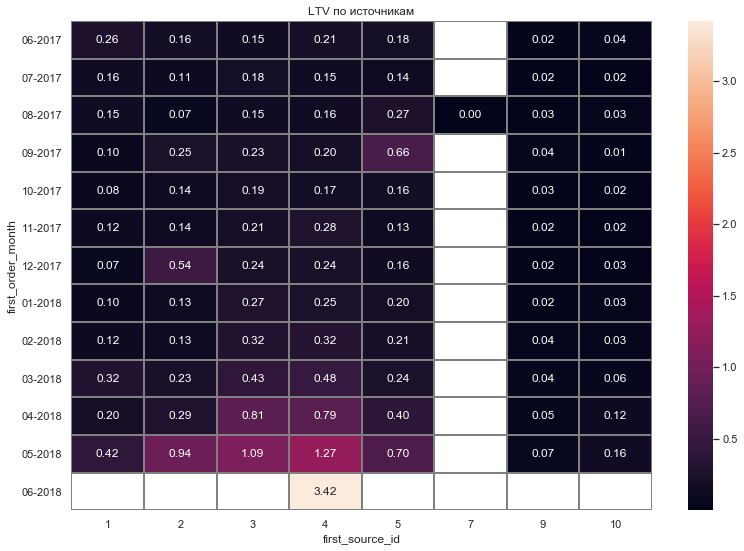

In [134]:
plt.figure(figsize=(13, 9))
plt.title('LTV по источникам')
output_ltv.index = output_ltv.index.strftime("%m-%Y")


sns.heatmap(output_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

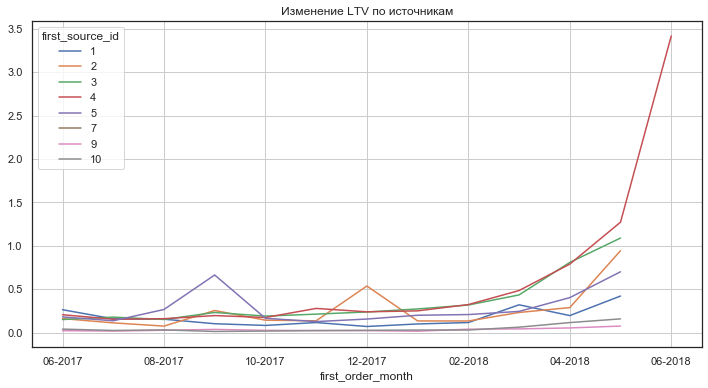

In [135]:
output_ltv.plot(grid=True, figsize=(12,6), title = 'Изменение LTV по источникам')
plt.show()

#### Сколько стоило привлечение из каждого источника

In [136]:
monthly_costs = costs.groupby('month').agg({'costs':'sum'}).reset_index()

In [137]:
report_end_new = pd.merge(report_end, monthly_costs, left_on = 'first_order_month', right_on='month')
report_end_new['cac'] = report_end_new['costs']/report_end_new['n_buyers']

In [138]:
report_end['ltv'] = report_end['gp'] / report_end['n_buyers']
    
output_cac = report_end_new.pivot_table(
        index='first_order_month', 
        columns='first_source_id', 
        values='cac', 
        aggfunc='sum')#.cumsum(axis=1)

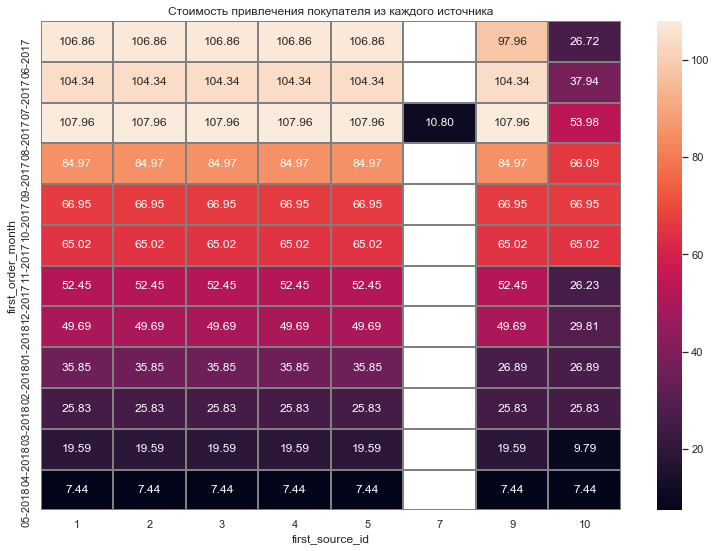

In [139]:
plt.figure(figsize=(13, 9))
plt.title('Стоимость привлечения покупателя из каждого источника')
output_cac.index = output_cac.index.strftime("%m-%Y")


sns.heatmap(output_cac, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

In [140]:
report_end_new['cac'].mean()

9.315209258520618

In [141]:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,2017-06-01,18015.0,8.905091


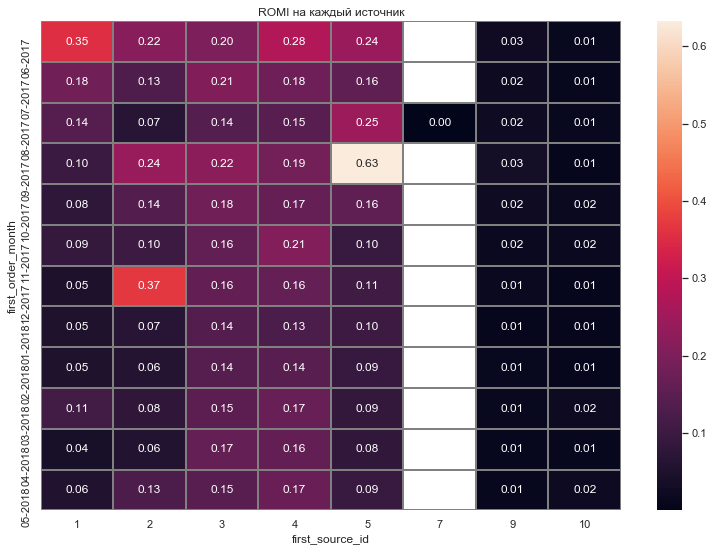

In [142]:
#Рассчитаем ROMI: поделим LTV на CAC.
report_end_new['romi'] = report_end_new['ltv'] / report_end_new['cac']
report_end['ltv'] = report_end['gp'] / report_end['n_buyers']
    
output_romi = report_end_new.pivot_table(
        index='first_order_month', 
        columns=['first_source_id'],
        values='romi', 
        aggfunc='sum')#.cumsum(axis=1)


plt.figure(figsize=(13, 9))
plt.title('ROMI на каждый источник')
output_romi.index = output_romi.index.strftime("%m-%Y")


sns.heatmap(output_romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

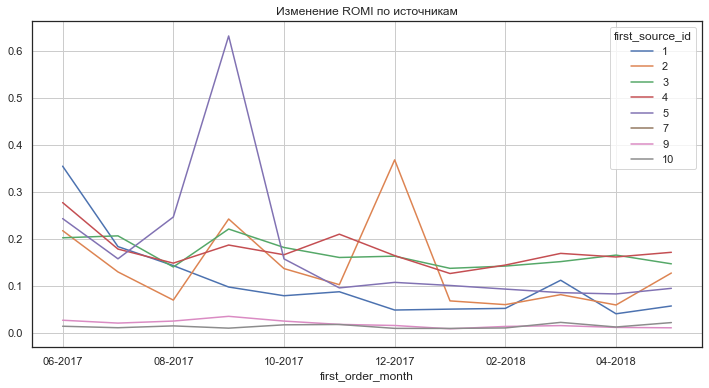

In [143]:
output_romi.plot(grid=True, figsize=(12,6), title = 'Изменение ROMI по источникам')
plt.show()

### Маркетинг

Сколько денег потратили? Всего / на каждый источник / по времени

In [144]:
#всего
costs.groupby('source_id').agg({'costs': 'sum'}).cumsum(axis=1).mean(axis=0)


costs    47018.802857
dtype: float64

На каждый источник

In [145]:
# на каждый источник
source_costs = costs.groupby(['source_id']).agg({'costs':'sum'}).sort_values(by='costs', ascending=False).reset_index()

source_costs.nlargest(10, 'costs') #с помощью метода nlargest вернули первые 10 строк, упорядоченных по столбцам в порядке убывания.


,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


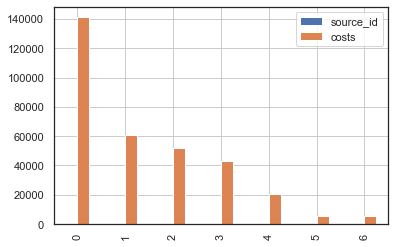

In [146]:
source_costs.nlargest(100, 'costs').plot(kind='bar', grid=True)
plt.show()

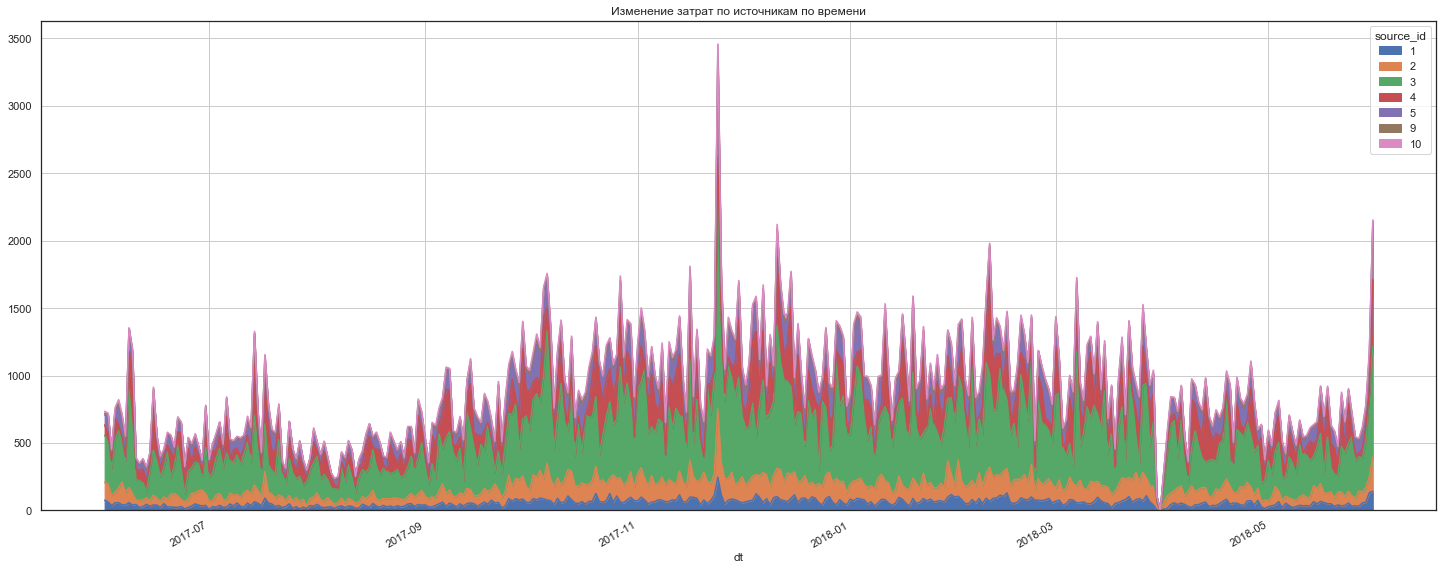

In [147]:
# по времени
costs.pivot_table(index='dt', columns='source_id', values='costs', aggfunc='sum').plot(kind='area', figsize=(25,10), grid=True, title = 'Изменение затрат по источникам по времени')
plt.show())

### Вывод

Необходимо помочь маркетологам оптимизировать маркетинговые затраты, для этого:

- Загружены данные и подготовлены к анализу
- Построены отчеты и посчитаны метрики по продукту, продажам и маркетингу.
- Проведен исследовательский анализ данных.
- Написаны выводы.

Проанализировав данные по продукту и поьзователям, можно сделать вывод,что не так много пользователей регулярно пользуются продуктом. Количество уникальных пользователей растет и достигает своего максимума ближе к концу года - в ноябре,  минимум пользовательской активности наблюдается в летнее время.

В качестве устройства для пользования продуктом пользователи предпочитают desktop (73%). Пользователей больше всего приходит из рекламного источника, идентификатор которого равен 4 и 3, меньше всего пользователей приходит из источника 6 и 7.

В день пользователи проводят максимум одну одну сессию. Чаще всего одна сессия длится 60 секунд, что говорит о том, что люди заходят на сайт и быстро уходят.

Чтобы узнать, как часто люди возвращаются, был посчитан Retetion Rate. За 11 месяцев коэффициент удержания упал на 3.1%. 
Совершают покупки люди в основном в тот же день, что и первый визит.

К 6 месяцу жизни в 1 когорте совершается в среднем 1,7 покупок, в 4 - 1,42 покупки, в 7 - 1,34 покупок, откуда следует, что кол-во покупок уменьшается с каждой новой когортой.

Средний чек за месяц составляет 5.87 у.е. Средний LTV за все время равен 8.05 у.е.

Средний ltv за все время равен 8.05 у.е.

В среднем когорта окупается к 9 месяцу

Больше всего денег приносит клиент из источников 4 и 3, меньще всего - 9 и 10.

Стоимость привлечение одного покупателя падает с каждой когортой.

Всего затрачено на маркетинг 47018 у.е., из них - на 3 и 4 источники, меньще всего затрачено на маркетинг источников 9 и 10.


Из вышесказанного можно сделать вывод, что в целом проект убыточный, так как привлечение покупателя обходится компании дороже, чем то, сколько покупатель приносит денег. Следовательно, отделу маркетинга стоит пересмотреть свои затраты: необходимо оптимизировать затраты под стационарные компьютеры и ноутбуки, так как количество пользователь составляет 73 %, также можно увеличить расходы на источники 9 и 10, так как из этих источников приходит достаточное количество посетителей, но затрачивается на эти источники минимум денег.


